In [7]:
from src.perceptron import Perceptron
from src.data_generator import NormalGenerator
from typing import List, Tuple, Any

import numpy as np
import matplotlib.pyplot as plt
import math

In [8]:
def train_loop(N_range: np.ndarray, alpha_range: np.ndarray,
			   nd: int = 200, nmax: int = 100) -> List[float]:

	results = list()

	for N in N_range:
		
		print(f"Doing {N = }")
		
		generator = NormalGenerator(N)
		success_runs = np.zeros(len(alpha_range))

		for i, alpha in enumerate(alpha_range):
			P = int(alpha * N)

			success_sum = 0
			for _ in range(nd):
				perceptron = Perceptron(N)
				X, Y = generator.generate(P)
				if perceptron.train(X, Y, nmax):
					success_sum += 1

			success_runs[i] = float(success_sum) / float(nd)
		
		results.append(success_runs)

	return results

In [9]:
alpha_range1 = np.arange(0.75, 3.01, 0.25)
N_range1 = np.array([20, 50])

results1 = train_loop(N_range1, alpha_range1)

Doing N = 20
Doing N = 50


In [10]:
alpha_range2 = np.arange(1.0, 2.51, 0.10)
N_range2 = np.array([5, 20, 50, 100])

results2 = train_loop(N_range2, alpha_range2, nd=500)

Doing N = 5
Doing N = 20
Doing N = 50
Doing N = 100


In [12]:
def plot_results(alpha_range: np.ndarray, N_range: np.ndarray,
                 results: List[float]) -> Tuple[Any, Any]:

    fig, plots = plt.subplots(1, len(results), figsize=(len(results) * 4, 3))
    for i, plot in enumerate(plots):
        plot.plot(alpha_range, results[i])
        plot.set_title(f"N = {N_range[i]}")

    return fig, plots

Text(0, 0.5, '$Q_{l.s.}$')

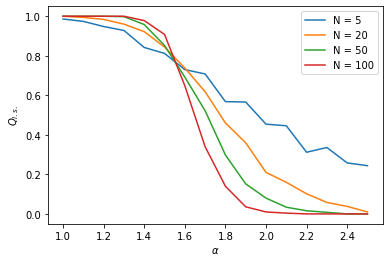

In [13]:
plt.close()

# fig, plots = plot_results(alpha_range1, N_range1, results1)
for i in range(len(N_range2)):
    plt.plot(alpha_range2, results2[i], label=f"N = {N_range2[i]}")

plt.legend()
plt.xlabel("$\\alpha$")
plt.ylabel("$Q_{l.s.}$")

N = 20
N = 50


Text(0, 0.5, '$P_{l.s.}$ and $success rate$')

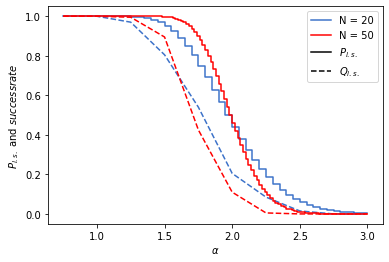

In [14]:
alphas = []
plses = []

for N in N_range1:
    print(f"{N = }")
    alpha = []
    pls = []
    for P in range(1, N * 4 + 1):
        total = 2**P
        if P <= N:
            pls.append(1)
        else:
            count = 0
            for i in range(N):
                count += math.comb(P - 1, i)
            pls.append(count * 2.0 / total)
        alpha.append(P * 1.0 / N)
    alphas.append(alpha)
    plses.append(pls)
    # plt.step(alpha, pls, label=f"{N}")

# plt.xlabel("$\\alpha=\\frac{P}{N}$")
# plt.ylabel("$P_{l.s.}$")
# plt.xticks(list(range(0, 5, 1)))
# plt.legend(title="N")
# plt.tight_layout()

plt.close()

colors = ['#3c72c9', 'red']
# fig, plots = plot_results(alpha_range1, N_range1, results1)
for i, N in enumerate(N_range1):
    plt.plot(alpha_range1, results1[i], '--', c=colors[i])
    alpha = np.array(alphas[i])
    pls = np.array(plses[i])
    idx = (alpha >= alpha_range1[0]) & (alpha <= alpha_range1[-1])
    plt.step(alpha[idx], pls[idx], label=f"N = {N_range1[i]}", c=colors[i])

plt.plot(2.0, 0, c='k', label="$P_{l.s.}$")
plt.plot(2.0, 0, '--', c='k', label="$Q_{l.s.}$")

plt.legend()

plt.xlabel("$\\alpha$")
plt.ylabel("$P_{l.s.}$ and $success rate$")

(<Figure size 1152x216 with 4 Axes>,
 array([<AxesSubplot:title={'center':'N = 5'}>,
        <AxesSubplot:title={'center':'N = 20'}>,
        <AxesSubplot:title={'center':'N = 50'}>,
        <AxesSubplot:title={'center':'N = 100'}>], dtype=object))

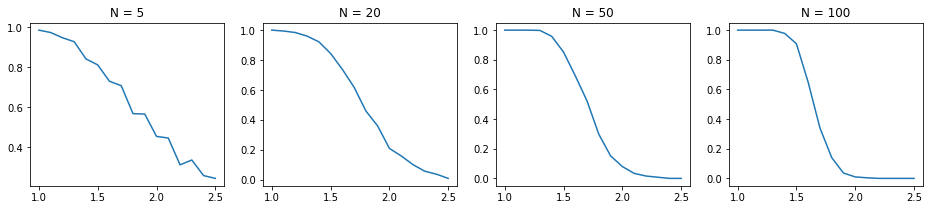

In [15]:
plot_results(alpha_range2, N_range2, results2)